In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
single_acc = np.loadtxt('results/single_acc.txt')
independent_acc = np.loadtxt('results/independent_acc.txt')
multimodal_acc = np.loadtxt('results/multimodal_acc.txt')
ewc_acc = np.loadtxt('results/ewc_acc.txt')
gem_acc = np.loadtxt('results/gem_acc.txt')

single_init = np.loadtxt('results/single_init.txt')
independent_init = np.loadtxt('results/independent_init.txt')
multimodal_init = np.loadtxt('results/multimodal_init.txt')
ewc_init = np.loadtxt('results/ewc_init.txt')
gem_init = np.loadtxt('results/gem_init.txt')

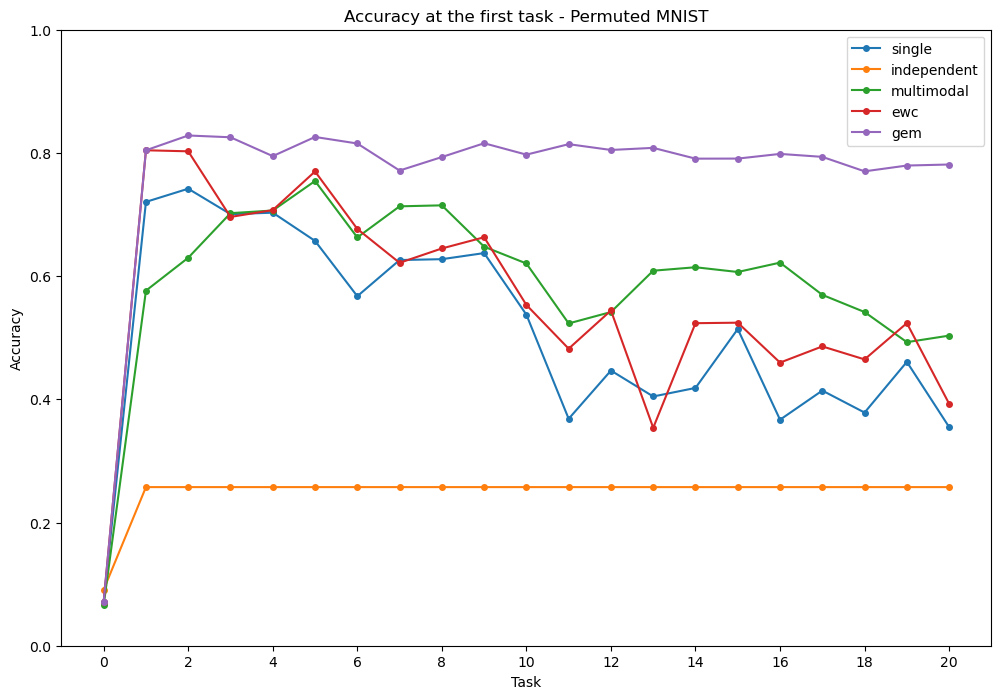

In [25]:
# Plot accuracy at the first task
plt.figure(figsize=(12, 8))

# Add init accuracy to each model
plt.plot(np.concatenate([single_init[[0]], single_acc[:, 0]]), '-o', label='single', markersize=4)
plt.plot(np.concatenate([independent_init[[0]], independent_acc[:, 0]]), '-o', label='independent', markersize=4)
plt.plot(np.concatenate([multimodal_init[[0]], multimodal_acc[:, 0]]), '-o', label='multimodal', markersize=4)
plt.plot(np.concatenate([ewc_init[[0]], ewc_acc[:, 0]]), '-o', label='ewc', markersize=4)
plt.plot(np.concatenate([gem_init[[0]], gem_acc[:, 0]]), '-o', label='gem', markersize=4)

plt.title('Accuracy at the first task - Permuted MNIST')
plt.xlabel('Task')
plt.ylabel('Accuracy')
plt.xticks(range(0, 22, 2))
plt.ylim(0, 1)
plt.legend()

plt.show()

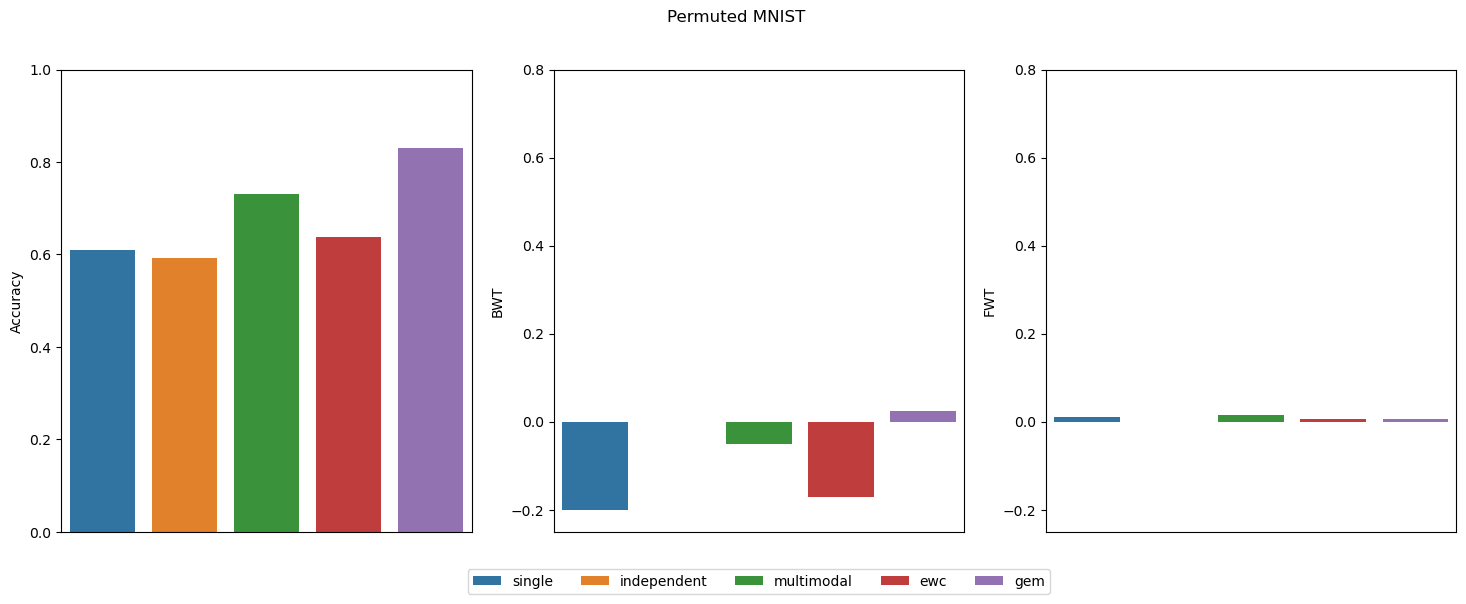

In [51]:
# Plot average accuracy for each model
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(
    x='model', y='Accuracy', data=pd.DataFrame(
        {'model': ['single', 'independent', 'multimodal', 'ewc', 'gem'],
         'Accuracy': [single_acc[-1].mean(), independent_acc[-1].mean(), multimodal_acc[-1].mean(), ewc_acc[-1].mean(), gem_acc[-1].mean()]}), 
    ax=ax[0]
)
ax[0].set_xticks([])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('')

# Plot backward transfer for each model
sns.barplot(
    x='model', y='BWT', data=pd.DataFrame(
        {'model': ['single', 'independent', 'multimodal', 'ewc', 'gem'],
        'BWT': [(single_acc[-1].sum() - np.trace(single_acc)) / 19, (independent_acc[-1].sum() - np.trace(independent_acc)) / 19, (multimodal_acc[-1].sum() - np.trace(multimodal_acc)) / 19, (ewc_acc[-1].sum() - np.trace(ewc_acc)) / 19, (gem_acc[-1].sum() - np.trace(gem_acc)) / 19]}),
    ax=ax[1]
)



# Set legend with colors for each model
ax[1].legend([plt.Rectangle((0, 0), 1, 1, fc=pc.get_facecolor()) for pc in ax[0].patches],
            ['single', 'independent', 'multimodal', 'ewc', 'gem'], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.15))
ax[1].set_xticks([])
ax[1].set_ylim(-0.25, 0.8)
ax[1].set_xlabel('')

# Plot forward transfer for each model
sns.barplot(
    x='model', y='FWT', data=pd.DataFrame(
        {'model': ['single', 'independent', 'multimodal', 'ewc', 'gem'],
        'FWT': [(single_acc[np.arange(19), np.arange(1, 20)].sum() - single_init[1:].sum()) / 19,
                (independent_acc[np.arange(19), np.arange(1, 20)].sum() - independent_init[1:].sum()) / 19,
                (multimodal_acc[np.arange(19), np.arange(1, 20)].sum() - multimodal_init[1:].sum()) / 19,
                (ewc_acc[np.arange(19), np.arange(1, 20)].sum() - ewc_init[1:].sum()) / 19,
                (gem_acc[np.arange(19), np.arange(1, 20)].sum() - gem_init[1:].sum()) / 19
                ]}),
    ax=ax[2]
)

ax[2].set_xticks([])
ax[2].set_ylim(-0.25, 0.8)
ax[2].set_xlabel('')

plt.suptitle('Permuted MNIST')
plt.show()